In [16]:
import pandas as pd
import plotly.express as px
from datetime import datetime 

[Istat Serie Storiche]("http://seriestoriche.istat.it/index.php?id=1&no_cache=1&tx_usercento_centofe%5Bcategoria%5D=7&tx_usercento_centofe%5Baction%5D=show&tx_usercento_centofe%5Bcontroller%5D=Categoria&cHash=1b020e5419ca607971010a98271e3209")

[Data set link (in xls)]("http://seriestoriche.istat.it/fileadmin/documenti/Tavola_7.3.xls")

In [17]:
url = '/tmp/female_birth.csv'
df1 = pd.read_csv(url)
print(df1.head())

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


In [18]:
df1 = df1[['Date', 'Births']]
df1.sort_values(by='Date', inplace=True, ascending=True)
print(df1.head())

         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


In [19]:
fig = px.line(df1, x = 'Date', y = 'Births', title='Iscritti all\'universita\' anni 1966 - 2014 (in migliaia)')
fig.show()

In [20]:
df1.insert(0, 'id', range(0,len(df1)))
print(df1.head())

   id        Date  Births
0   0  1959-01-01      35
1   1  1959-01-02      32
2   2  1959-01-03      30
3   3  1959-01-04      31
4   4  1959-01-05      44


In [21]:
from sklearn.model_selection import train_test_split
X = df1[['id']].values.reshape(-1,1)
y = df1[['Births']].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
from sklearn.svm import SVR

In [23]:
# !!! Con kernel rbf scazza le previsioni.
# !!! Con kernel linear molto meglio !!!
regressor = SVR(kernel='rbf', C=100, gamma=0.05, epsilon=.1)
regressor.fit(X_train,y_train)

/home/enrico/.conda/envs/ssd/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})


In [25]:
df

,Actual,Predicted
0,42,39.919277
1,57,44.737208
2,45,48.677642
3,23,29.712311
4,43,31.006370
...,...,...
141,58,43.432864
142,30,41.972054
143,30,43.856315
144,55,61.726928


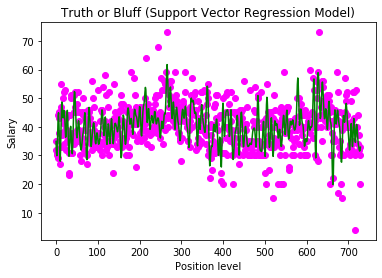

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [27]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_pred.flatten(),
                    mode='markers',
                    name='predicted data'))
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_test.flatten(),
                    mode='markers',
                    name='test data'))

fig.show()